# Imports

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import math

# Functions

In [156]:
def normalize(dataframe):
    """
    Receives a pandas dataframe and returns a normalized one
    """

    normalizedDf = dataframe.copy()
    for column in dataframe.columns:
        maxVal = dataframe.loc[:,column].max()
        normalizedDf[column] = dataframe[column] / dataframe[column].max()
    return normalizedDf

In [157]:
def sse(X, y, w):
    error = y - X @ w
    return error.T @ error

In [158]:
def stochastic_descent(X , y, alpha, epochs):
    w = np.array([[0.0, 0.0]])
    w = w.T
    random.seed(0)
    shuffled = list(range(len(X)))
    epochData = []
    sseData = []
    for epoch in range(epochs):
        random.shuffle(shuffled)
        wOld = w
        for j in shuffled:
            loss = y[j] - X[j] @ w
            gradient = loss * X[j].reshape(-1,1)  #As described in 18.5 page 720
            w = w + alpha * gradient
        epochData.append(w)
        sumErr = sse(X,y,w)
        sseData.append(sumErr[0][0])
        if np.linalg.norm(w-wOld)/ np.linalg.norm(w) < 0.0005:
            print("Converged at epoch:", epoch)
            break
    return w , epochData, sseData
    

In [159]:
def batch_descent(X, y, alpha, epochs):
    
    w = np.array([[0.0, 0.0]])
    w = w.T
    alpha = alpha/len(X)
    epochData = []
    for epoch in range(epochs):
        w_old = w
        loss = y - X @ w
        gradient = X.T @ loss
        wOld = w
        w = w + alpha * gradient
        epochData.append(w)
        if np.linalg.norm(w-wOld)/ np.linalg.norm(w) < 0.0005:
            print("Converged at epoch:", epoch)
            break
    return w, epochData

In [160]:
def perceptron(X, y, alpha):
    w = np.array([np.zeros(X.shape[1])])
    w = w.T    
    correct = 0
    epoch= 1
    random.seed(0)
    while(True):
        random.seed(None)
        j = random.randint(0,len(X)-1)
        prediction = predict(X[j],w)
        if prediction != y[j]:
            corr = alpha*y[j]*X[j]
            w = w + corr.reshape(-1,1)
            correct = 0
        else:
            correct += 1
        if correct > 100:
            print("Perceptron done at: ", epoch)
            break
        epoch +=1
            
    return w

In [161]:
def predict(x, w):
    prediction = x.T @ w
    if prediction > 0:
        res = 1
    else:
        res = -1
    return res


In [162]:
def logistic_regr(X, y, alpha):
    w = np.array([np.zeros(X.shape[1])])
    w = w.T
    shuffled = list(range(len(X)))
    epochData = []
    epoch = 1
    correct = 0
    while(True):
        j = random.randint(0,len(X)-1)
        prediction = predict_r(X[j],w)
        if prediction != y[j]:
            sig = sigmoid(X[j],w)
            loss = y[j] - sig
            gradient = sig*(1-sig)
            w = w + alpha*gradient*loss*X[j].reshape(-1,1)
            correct = 0
        else:
            correct +=1

        if correct > 100:
            print("Converged at epoch:", epoch)
            break
        epoch += 1
            
    return w
            
    
    

In [163]:
def predict_r(x, w):
    prediction = x.T @ w
    if prediction > 0:
        res = 1
    else:
        res = 0
    return res

In [164]:
def sigmoid(x, w):
    prediction = x.T @ w
    
    sig = 1/(1+math.exp(-prediction))
    
    return sig

# Solution

## Linear Regression

### Format Data

In [165]:
enData = pd.read_csv('https://raw.githubusercontent.com/pnugues/ilppp/master/programs/ch04/salammbo/salammbo_a_en.tsv', delimiter='\t',names=['Count Characters', 'Count A'])
frData = pd.read_csv('https://raw.githubusercontent.com/pnugues/ilppp/master/programs/ch04/salammbo/salammbo_a_fr.tsv', delimiter='\t',names=['Count Characters', 'Count A'])

    Count Characters  Count A
0              35680     2217
1              42514     2761
2              15162      990
3              35298     2274
4              29800     1865
5              40255     2606
6              74532     4805
7              37464     2396
8              31030     1993
9              24843     1627
10             36172     2375
11             39552     2560
12             72545     4597
13             75352     4871
14             18031     1119
    Count Characters  Count A
0              36961     2503
1              43621     2992
2              15694     1042
3              36231     2487
4              29945     2014
5              40588     2805
6              75255     5062
7              37709     2643
8              30899     2126
9              25486     1784
10             37497     2641
11             40398     2766
12             74105     5047
13             76725     5312
14             18317     1215


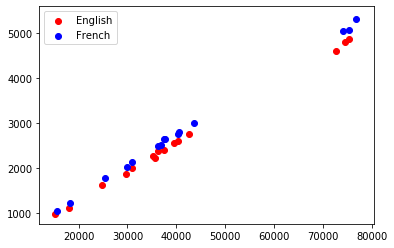

In [166]:
plt.scatter(enData['Count Characters'],enData['Count A'],color='r',label='English')
plt.scatter(frData['Count Characters'],frData['Count A'],color='b',label='French')
plt.legend()
print(enData)
print(frData)

Now, let's normalize the data:

In [167]:
nDfEn = normalize(enData)
X = np.array(nDfEn['Count Characters'])
y = np.array([nDfEn['Count A']])
X_en = np.c_[np.ones(len(X)),X]
y_en = y.T
print("Normalized english data:")
print(nDfEn)
nDfFr = normalize(frData)
X = np.array(nDfFr['Count Characters'])
y = np.array([nDfFr['Count A']])
X_fr = np.c_[np.ones(len(X)),X]
y_fr = y.T
print(nDfFr)

Normalized english data:
    Count Characters   Count A
0           0.473511  0.455143
1           0.564205  0.566824
2           0.201216  0.203244
3           0.468441  0.466845
4           0.395477  0.382878
5           0.534226  0.535003
6           0.989118  0.986450
7           0.497187  0.491891
8           0.411801  0.409156
9           0.329693  0.334018
10          0.480040  0.487580
11          0.524896  0.525559
12          0.962748  0.943749
13          1.000000  1.000000
14          0.239290  0.229727
    Count Characters   Count A
0           0.481733  0.471197
1           0.568537  0.563253
2           0.204549  0.196160
3           0.472219  0.468185
4           0.390290  0.379142
5           0.529006  0.528050
6           0.980841  0.952937
7           0.491483  0.497553
8           0.402724  0.400226
9           0.332173  0.335843
10          0.488719  0.497176
11          0.526530  0.520708
12          0.965852  0.950113
13          1.000000  1.000000
14          0.

### Stochastic descent

Converged at epoch: 240
[[0.00114653]
 [0.99611361]]


Text(0.5, 1.0, 'English data')

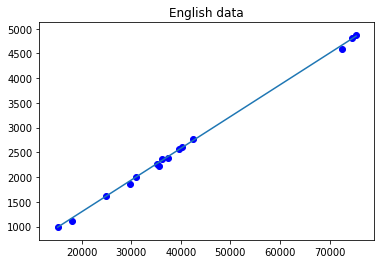

In [168]:
#English Data
alpha = 0.5
epochs = 500
w,epochData,sseData = stochastic_descent(X_en, y_en, alpha, epochs)
print(w)
xMin = enData['Count Characters'].min()
xMax = enData['Count Characters'].max()
yMin = enData['Count A'].min()
yMax = enData['Count A'].max()

plt.plot([xMin, xMax],
         [[1, yMin] @ w, [1, yMax] @ w])
plt.scatter(enData['Count Characters'],enData['Count A'],color='b')
plt.title("English data")

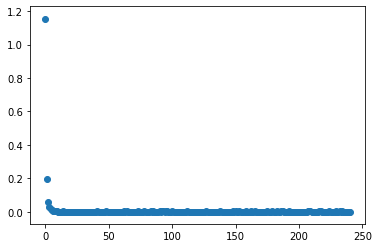

In [169]:
x_plot = np.arange(len(sseData))
plt.scatter(x_plot,sseData)

Converged at epoch: 102
[[0.00682191]
 [0.99067134]]


Text(0.5, 1.0, 'French data')

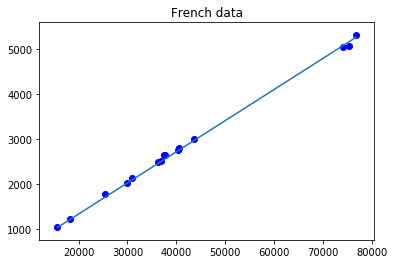

In [170]:
#French Data
alpha = 0.5
epochs = 500
w,epochData,sseData = stochastic_descent(X_fr, y_fr, alpha, epochs)

print(w)
xMin = frData['Count Characters'].min()
xMax = frData['Count Characters'].max()
yMin = frData['Count A'].min()
yMax = frData['Count A'].max()
plt.plot([xMin, xMax],
         [[1, yMin] @ w, [1, yMax] @ w])
plt.scatter(frData['Count Characters'],frData['Count A'],color='b')
plt.title('French data')

##### Visualize what happens with regression line during first epochs

Text(0.5, 1.0, 'English data')

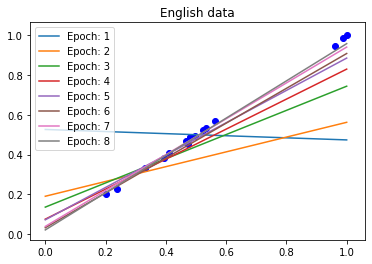

In [171]:
#English data
epochs = 8 #Limit epochs to 8 for visualisation purposes during first epochs
w,epochData,sseData = stochastic_descent(X_en, y_en, alpha, epochs)

count=1
for wLog in epochData:
    plt.plot(wLog, label = 'Epoch: ' + str(count))
    count+=1

plt.scatter(nDfEn['Count Characters'],nDfEn['Count A'],color='b')
plt.legend()
plt.title('English data')

Text(0.5, 1.0, 'French data')

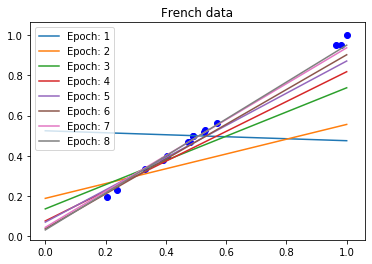

In [172]:
#French data
epochs = 8 #Limit epochs to 8 for visualisation purposes during first epochs
w,epochData, sseData = stochastic_descent(X_fr, y_fr, alpha, epochs)

count=1
for wLog in epochData:
    plt.plot(wLog, label = 'Epoch: ' + str(count))
    count+=1
    
plt.scatter(nDfFr['Count Characters'],nDfFr['Count A'],color='b')
plt.legend()
plt.title('French data')

### Batch descent

Converged at epoch: 94
[[0.00423886]
 [0.98588298]]


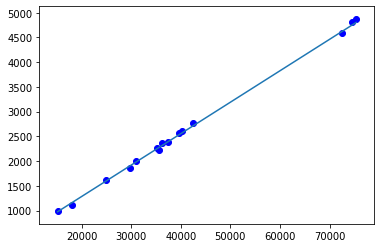

In [173]:
alpha = 1
epochs = 500
w, epochData = batch_descent(X_en, y_en, alpha, epochs)

print(w)
xMin = enData['Count Characters'].min()
xMax = enData['Count Characters'].max()
yMin = enData['Count A'].min()
yMax = enData['Count A'].max()

plt.plot([xMin, xMax],
         [[1, yMin] @ w, [1, yMax] @ w])
plt.scatter(enData['Count Characters'],enData['Count A'],color='b')

Converged at epoch: 95
[[0.00648118]
 [0.97794734]]


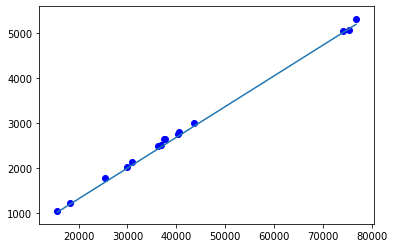

In [174]:
alpha = 1
epochs = 500
w,epochData = batch_descent(X_fr, y_fr, alpha, epochs)

print(w)
xMin = frData['Count Characters'].min()
xMax = frData['Count Characters'].max()
yMin = frData['Count A'].min()
yMax = frData['Count A'].max()

plt.plot([xMin, xMax],
         [[1, yMin] @ w, [1, yMax] @ w])
plt.scatter(frData['Count Characters'],frData['Count A'],color='b')

## Perceptron

We will now label english and french dataset. We label french as 1 and english as -1.

In [175]:
frData = pd.read_csv('https://raw.githubusercontent.com/pnugues/ilppp/master/programs/ch04/salammbo/salammbo_a_fr.tsv', delimiter='\t',names=['Count Characters', 'Count A'])

In [176]:
enData = pd.read_csv('https://raw.githubusercontent.com/pnugues/ilppp/master/programs/ch04/salammbo/salammbo_a_en.tsv', delimiter='\t',names=['Count Characters', 'Count A'])

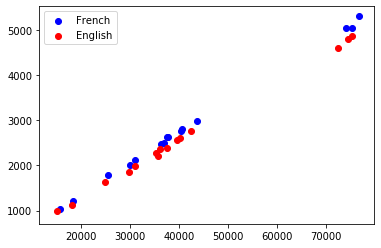

In [177]:
data = frData.append(enData, ignore_index=True)
X = normalize(data)
plt.scatter(frData.iloc[:,0],frData.iloc[:,1], color = 'b', label='French')
plt.scatter(enData.iloc[:,0],enData.iloc[:,1], color = 'r', label='English')
plt.legend()
X = np.c_[np.ones(len(X)),X]
y_fr = np.array([np.ones(len(frData))]).T
y_en = np.array([np.ones(len(enData))]).T
y_en = np.negative(y_en)
y = np.append(y_fr,y_en)
y = y.reshape(-1,1)


We will now train a perceptron to classify english and french.

Perceptron done at:  1591
w =  [[ 0.        ]
 [-0.02861473]
 [ 0.02995858]]


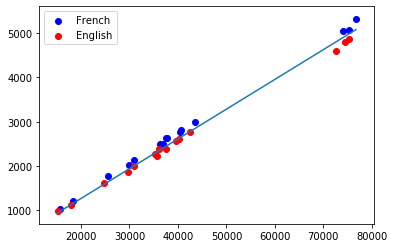

In [178]:
alpha = 0.005
w = perceptron(X,y, alpha)
print("w = ", w)
intercept = -w[0]/w[2]
slope = -w[1]/w[2]
W = np.append(intercept,slope).reshape(-1,1)

xMin = data['Count Characters'].min()
xMax = data['Count Characters'].max()
yMin = data['Count A'].min()
yMax = data['Count A'].max()

plt.plot([xMin, xMax],
         [[1, yMin] @ W, [1, yMax] @ W])
plt.scatter(frData.iloc[:,0],frData.iloc[:,1], color = 'b', label='French')
plt.scatter(enData.iloc[:,0],enData.iloc[:,1], color = 'r', label='English')
plt.legend()

Perceptron seems to be working. Let's evaluate with cross validation.

### Cross validation

In [179]:
correct= 0
runs = 30
for i in range(0,runs):
    X_train = np.copy(X)
    y_train = np.copy(y)
    X_test = X_train[i]
    y_test = y_train[i]
    X_train = np.delete(X_train,i,0)
    y_train = np.delete(y_train,i,0)
    
    w = perceptron(X_train, y_train, alpha)
    
    prediction = predict(X_test,w)
    if(prediction == y_test):
        correct += 1

acc = correct/runs
print("Accuracy: ", acc)
    

Perceptron done at:  498
Perceptron done at:  956
Perceptron done at:  989
Perceptron done at:  121
Perceptron done at:  1026
Perceptron done at:  1424
Perceptron done at:  507
Perceptron done at:  582
Perceptron done at:  610
Perceptron done at:  1100
Perceptron done at:  1967
Perceptron done at:  567
Perceptron done at:  913
Perceptron done at:  406
Perceptron done at:  970
Perceptron done at:  1100
Perceptron done at:  1303
Perceptron done at:  889
Perceptron done at:  661
Perceptron done at:  1536
Perceptron done at:  1499
Perceptron done at:  532
Perceptron done at:  512
Perceptron done at:  1410
Perceptron done at:  965
Perceptron done at:  463
Perceptron done at:  449
Perceptron done at:  2244
Perceptron done at:  1408
Perceptron done at:  616
Accuracy:  0.9666666666666667


At first I had a stopping criteria of 30, I could then only reach a accuracy of around 78%. I then increased the stopping critieria to 100, together with reducing the stepsize alpha to 0.005, and the result was a 100% accuracy.

## Logistic regression

Converged at epoch: 1421
W =  [[ 6.09736949e-07]
 [-3.12250341e-03]
 [ 3.27934307e-03]]


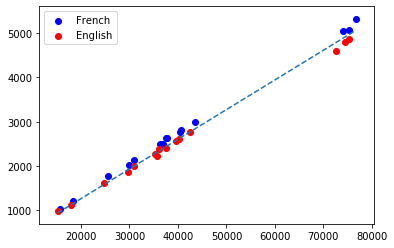

In [180]:
y_fr = np.array([np.ones(len(frData))])
y_en = np.array([np.zeros(len(enData))])
y = np.append(y_fr,y_en)
y = y.reshape(-1,1)

alpha = 0.005
w = logistic_regr(X,y,alpha)
print("W = ", w)
intercept = -w[0]/w[2]
slope = -w[1]/w[2]

W = np.append(intercept,slope).reshape(-1,1)

xMin = data['Count Characters'].min()
xMax = data['Count Characters'].max()
yMin = data['Count A'].min()
yMax = data['Count A'].max()

plt.plot([xMin, xMax],
         [[1, yMin] @ W, [1, yMax] @ W],'--')

plt.scatter(frData.iloc[:,0],frData.iloc[:,1], color = 'b', label='French')
plt.scatter(enData.iloc[:,0],enData.iloc[:,1], color = 'r', label='English')
plt.legend()

### Cross validation

Run:  0
Converged at epoch: 695
Run:  1
Converged at epoch: 1240
Run:  2
Converged at epoch: 1956
Run:  3
Converged at epoch: 2046
Run:  4
Converged at epoch: 2831
Run:  5
Converged at epoch: 812
Run:  6
Converged at epoch: 1049
Run:  7
Converged at epoch: 2582
Run:  8
Converged at epoch: 1504
Run:  9
Converged at epoch: 1536
Run:  10
Converged at epoch: 1129
Run:  11
Converged at epoch: 629
Run:  12
Converged at epoch: 1636
Run:  13
Converged at epoch: 1260
Run:  14
Converged at epoch: 826
Run:  15
Converged at epoch: 1093
Run:  16
Converged at epoch: 1304
Run:  17
Converged at epoch: 2352
Run:  18
Converged at epoch: 421
Run:  19
Converged at epoch: 1812
Run:  20
Converged at epoch: 1774
Run:  21
Converged at epoch: 1799
Run:  22
Converged at epoch: 2322
Run:  23
Converged at epoch: 476
Run:  24
Converged at epoch: 647
Run:  25
Converged at epoch: 1191
Run:  26
Converged at epoch: 2084
Run:  27
Converged at epoch: 2187
Run:  28
Converged at epoch: 2521
Run:  29
Converged at epoch: 13

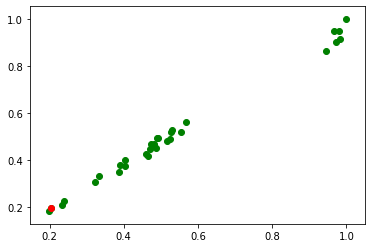

In [181]:
correct= 0
runs = 30
failure=[]
for i in range(0,runs):
    print("Run: ", i)
    X_train = np.copy(X)
    y_train = np.copy(y)
    X_test = X_train[i]
    y_test = y_train[i]
    X_train = np.delete(X_train,i,0)
    y_train = np.delete(y_train,i,0)
    
    w = logistic_regr(X_train, y_train, alpha)
    
    prediction = predict_r(X_test,w)
    if(prediction == y_test):
        correct += 1
    else:
        failure.append(X[i])

acc = correct/runs
print("Accuracy: ", acc)
plt.scatter(X[:,1],X[:,2],color='g')
try:
    print(failure)
    print(failure[0][1],failure[0][2])
    plt.scatter(failure[0][1],failure[0][2],color='r')
except:
    pass

